# Machine Learning Feature Analysis

In [2]:
from sources.ml_f1 import*
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
import pandas as pd

# ML models  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import plot_importance
import json

# plot style
import seaborn as sns
# sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_style("whitegrid")

---

In [3]:
# restoring machine learning data for different splits as ml dicts

# with open('ml_data.txt') as f:
with open("final_catlogue_ml_data.txt") as f:
    data = f.read()

with open('final_scale_ml_data.txt') as f:
    norm_data = f.read()

print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
ml_dicts = json.loads(data)

# reconstructing the data as a dictionary
norm_ml_dicts = json.loads(norm_data)
  
print("Data type after reconstruction : ", type(ml_dicts))

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>


In [3]:
# Set up models and Parameters for a "for loop"  
lr_model = LogisticRegression() #LR MODEL
knn_model = KNeighborsClassifier() #KNN MODEL
svm_model = SVC() #SVC MODEL
rf_model= RandomForestClassifier(random_state=1) #RF MODEL
xgb_model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='rmse', n_jobs=-1 )


models = [[lr_model, 'lr'], [knn_model, 'knn'], [svm_model, 'svm'], [rf_model, 'rf'], [xgb_model, 'xgb']]


# models = [[lr_model, 'lr'], [svm_model, 'svm'], [knn_model, 'knn'], [rf_model, 'rf'], [xgb_model, 'xgb']]

---

In [4]:
# Machine learning results for each split

res08 = result_per_split(ml_dicts ,models, 0.8)

res06 = result_per_split(ml_dicts ,models, 0.6)

res04 = result_per_split(ml_dicts ,models, 0.4)

res02 = result_per_split(ml_dicts ,models, 0.2)

all_res = [res08, res06, res04, res02]

In [5]:
# Machine learning results for each split

res08_norm = result_per_split(norm_ml_dicts ,models, 0.8)

res06_norm = result_per_split(norm_ml_dicts ,models, 0.6)

res04_norm = result_per_split(norm_ml_dicts ,models, 0.4)

res02_norm = result_per_split(norm_ml_dicts ,models, 0.2)

all_res_norm = [res08_norm, res06_norm, res04_norm, res02_norm]

In [6]:
# Machine learning results for each split baseline

base_arr08 =  base_per_split(ml_dicts, models, 0.8)

base_arr06 =  base_per_split(ml_dicts, models, 0.6) 

base_arr04 =  base_per_split(ml_dicts, models, 0.4) 

base_arr02 =  base_per_split(ml_dicts, models, 0.2) 

all_base = [base_arr08, base_arr06, base_arr04, base_arr02]


base_arr08_v =  base_per_split_vald(ml_dicts, models, 0.8)

base_arr06_v =  base_per_split_vald(ml_dicts, models, 0.6) 

base_arr04_v =  base_per_split_vald(ml_dicts, models, 0.4) 

base_arr02_v =  base_per_split_vald(ml_dicts, models, 0.2) 

all_base_v = [base_arr08_v, base_arr06_v, base_arr04_v, base_arr02_v]

In [7]:
features = [['qir'], 
            ['qir', 'class_star'],
            ['qir', 'class_star', 'log(S8/S45)'],
            ['qir', 'class_star', 'log(S8/S45)','log(S58/S36)'],
            ['qir', 'class_star', 'log(S8/S45)','log(S58/S36)', 'Mstar'],
            ['qir', 'class_star', 'log(S8/S45)','log(S58/S36)', 'Mstar', 'log(S45/S36)'],
            ['qir', 'class_star', 'Mstar', 'log(S45/S36)']]


modelname = ['LR', r'$k$NN', 'SVM', 'RF', 'XGB']


## VALIDATION RESULTS

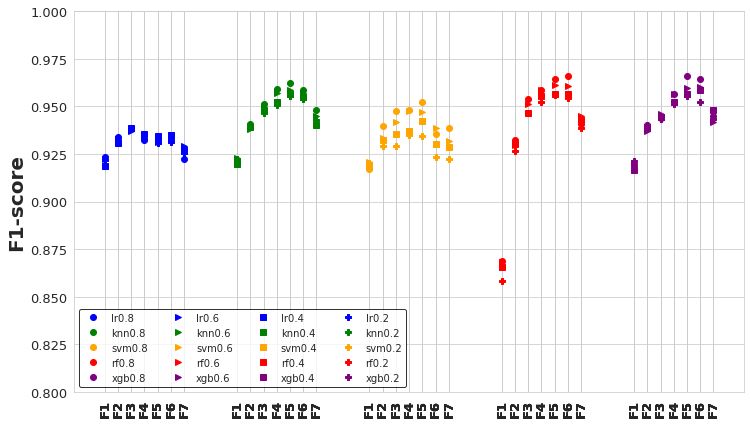

In [8]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5

space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(res, models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[1], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs=plt.errorbar( a, result[1], fmt=marker[i], label = model[1]+str(s[i]), color = color)
        axs=plt.ylabel("F1-score", fontweight = 'bold', fontsize =20)
        axs=plt.ylim(.80, 1)
        label = ''
        count += 1
    
    axs = plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 13)
    axs=plt.legend(loc = 'lower left', ncol = 4, edgecolor = 'k')
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []
    
plt.savefig('plots/ml-results/vald_comb.pdf')    
plt.show()

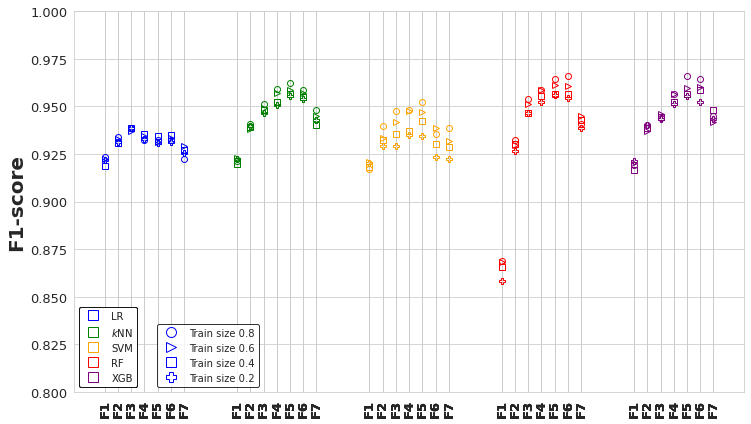

In [9]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5

space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(res, models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[1], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs.errorbar( a, result[1], fmt=marker[i],fillstyle='none', label = model[1], color = color)
        axs.set_ylabel("F1-score", fontweight = 'bold', fontsize =20)
        axs.set_ylim(.80, 1)
        label = ''
        count += 1
    
    axs.set_xticks(space)
    axs.set_xticklabels(tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 13)
    
    # Manually creating legend for first 5 points
    handles = [plt.Line2D([0], [0], marker="s", color='w', markerfacecolor=colors[i], markeredgecolor=colors[i], fillstyle='none', markersize=10, label=modelname[i])
           for i in range(5)]
    handles1 = [plt.Line2D([0], [0], marker=marker[i], color='w', markerfacecolor='b', markeredgecolor='b', fillstyle='none', markersize=10, label="Train size " + str(s[i]))
           for i in range(4)]
    axs_legend=axs.legend(handles=handles, loc = 'lower left', edgecolor = 'k')
    axs.add_artist(axs_legend)
    
    # axs.legend(handles=handles1, loc = 'lower center', edgecolor = 'k')
    axs.legend(handles=handles1, loc = 'lower center', bbox_to_anchor=(0.2, 0.0), edgecolor = 'k')
    
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []
    
plt.savefig('plots/ml-results/vald_comb_f1-scores.pdf')    
plt.show()

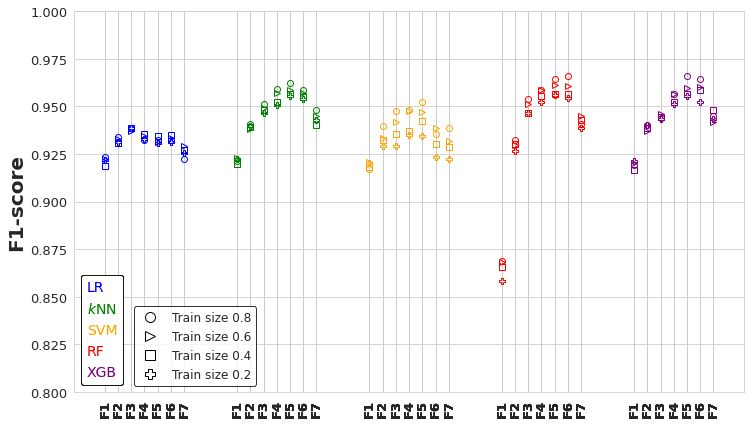

In [10]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5

space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(res, models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[1], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs.errorbar( a, result[1], fmt=marker[i],fillstyle='none', label = model[1], color = color)
        axs.set_ylabel("F1-score", fontweight = 'bold', fontsize =20)
        axs.set_ylim(.80, 1)
        label = ''
        count += 1
    
    axs.set_xticks(space)
    axs.set_xticklabels(tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 13)
    
    # Manually creating legend for first 5 points
    handles = [plt.Line2D([0], [0], marker=None, color=None, fillstyle='none',linewidth=0, markersize=0, label=modelname[i])
           for i in range(5)]
    # Creating legend with text only by using dummy text objects
    # handles = [plt.Text(0, 0, modelname[i]) for i in range(5)]
    handles1 = [plt.Line2D([0], [0], 
                           marker=marker[i], 
                           color='w', 
                           markerfacecolor='k', 
                           markeredgecolor='k', 
                           fillstyle='none', 
                           markersize=10, 
                           label="Train size " + str(s[i]))
           for i in range(4)]
    
    axs_legend=axs.legend(handles=handles, 
                          handlelength=0, 
                          handletextpad=0, 
                          fancybox=True,
                          loc = 'lower left',
                          edgecolor = 'k',
                          # markerfirst = False,
                          bbox_to_anchor=(0.0, 0.0, 0.2, 0.1),
                          framealpha=0.8,
                          fontsize=14)
    # leg = ax.legend(handlelength=0, handletextpad=0, fancybox=True)
    for item in axs_legend.legendHandles:
        item.set_visible(False)
    axs.add_artist(axs_legend)
    
    # Set colors for legend text
    for j, text in enumerate(axs_legend.get_texts()):
        text.set_color(colors[j])
    # axs.legend(handles=handles1, loc = 'lower center', edgecolor = 'k')
    axs.legend(handles=handles1, 
               loc = 'lower center', 
               bbox_to_anchor=(0.18, 0.0), 
               edgecolor = 'k', 
               fontsize=12)
    
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []
    
plt.savefig('plots/ml-results/vald_comb_f1-scores-final.pdf')    
plt.show()


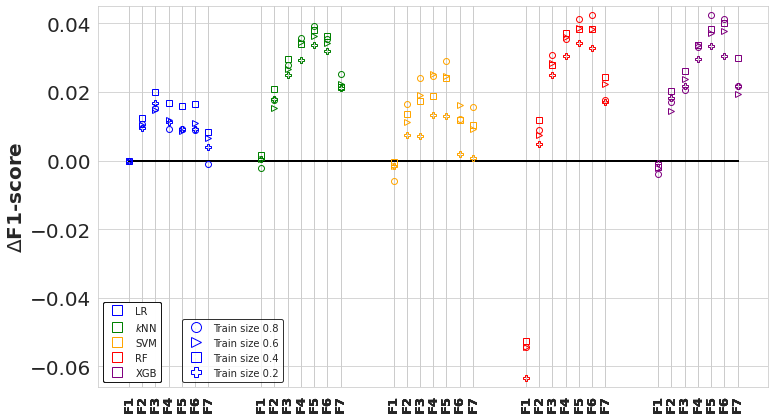

In [11]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5

space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(all_base_v[i], models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[1], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs.errorbar( a, result[1], fmt=marker[i], fillstyle='none', label = model[1], color = color)
        axs.set_ylabel("$\Delta$F1-score", fontweight = 'bold', fontsize =20)
        axs.set_ylim(-0.066,0.045)
        label = ''
        count += 1
    # print(space)    
    axs.plot(np.array(space), np.zeros(len(space)), color = 'Black')
    axs.set_xticks(space)
    axs.set_xticklabels( tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 20)
    
    # Manually creating legend for first 5 points
    handles = [plt.Line2D([0], [0], marker="s", color='w', markerfacecolor=colors[i], markeredgecolor=colors[i], fillstyle='none', markersize=10, label=modelname[i])
           for i in range(5)]
    handles1 = [plt.Line2D([0], [0], marker=marker[i], color='w', markerfacecolor='b', markeredgecolor='b', fillstyle='none', markersize=10, label="Train size " + str(s[i]))
           for i in range(4)]
    axs_legend=axs.legend(handles=handles, loc = 'lower left', edgecolor = 'k')
    axs.add_artist(axs_legend)
    
    # axs.legend(handles=handles1, loc = 'lower center', edgecolor = 'k')
    axs.legend(handles=handles1, loc = 'lower center', bbox_to_anchor=(0.2, 0.0), edgecolor = 'k')
    
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []

# plt.savefig('plots/ml-results/diff_comb_vald_baseline.pdf')        
plt.show()

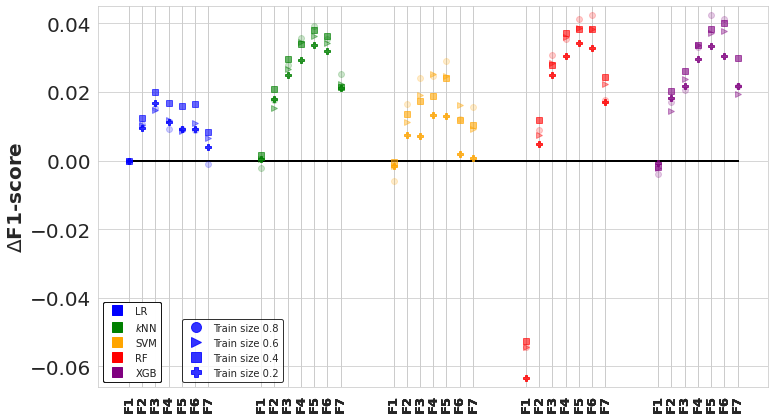

In [12]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5
alph = [0.2,0.4,0.6,0.8]
space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(all_base_v[i], models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[1], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs.errorbar( a, result[1], fmt=marker[i], label = model[1], color = color, alpha=alph[i])
        axs.set_ylabel("$\Delta$F1-score", fontweight = 'bold', fontsize =20)
        axs.set_ylim(-0.066,0.045)
        label = ''
        count += 1
    # print(space)    
    axs.plot(np.array(space), np.zeros(len(space)), color = 'Black')
    axs.set_xticks(space)
    axs.set_xticklabels( tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 20)
    
    # Manually creating legend for first 5 points
    handles = [plt.Line2D([0], [0], marker="s", color='w', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=10, label=modelname[i])
           for i in range(5)]
    handles1 = [plt.Line2D([0], [0], marker=marker[i], color='w', markerfacecolor='b', markeredgecolor='b', markersize=10, alpha=0.8, label="Train size " + str(s[i]))
           for i in range(4)]
    axs_legend=axs.legend(handles=handles, loc = 'lower left', edgecolor = 'k')
    axs.add_artist(axs_legend)
    
    # axs.legend(handles=handles1, loc = 'lower center', edgecolor = 'k')
    axs.legend(handles=handles1, loc = 'lower center', bbox_to_anchor=(0.2, 0.0), edgecolor = 'k')
    
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []

# plt.savefig('plots/ml-results/diff_comb_vald_baseline.pdf')        
plt.show()

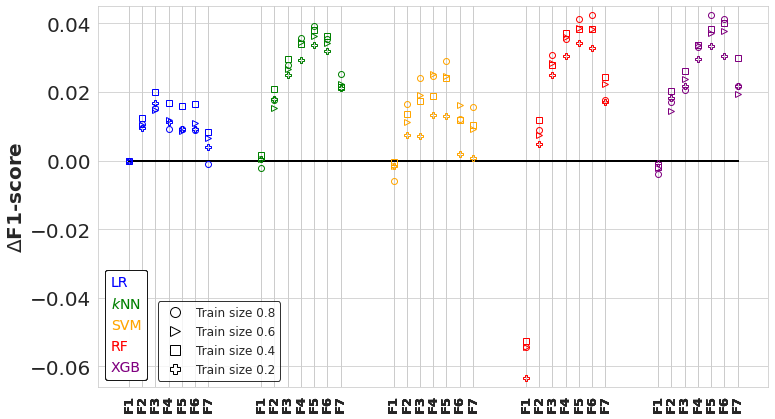

In [13]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5

space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(all_base_v[i], models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[1], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs.errorbar( a, result[1], fmt=marker[i], fillstyle='none', label = model[1], color = color)
        axs.set_ylabel("$\Delta$F1-score", fontweight = 'bold', fontsize =20)
        axs.set_ylim(-0.066,0.045)
        label = ''
        count += 1
    # print(space)    
    axs.plot(np.array(space), np.zeros(len(space)), color = 'Black')
    axs.set_xticks(space)
    axs.set_xticklabels( tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 20)
    
    # Manually creating legend for first 5 points
    handles = [plt.Line2D([0], [0], marker=None, color=None, fillstyle='none',linewidth=0, markersize=0, label=modelname[i])
           for i in range(5)]
    # Creating legend with text only by using dummy text objects
    # handles = [plt.Text(0, 0, modelname[i]) for i in range(5)]
    handles1 = [plt.Line2D([0], [0], 
                           marker=marker[i], 
                           color='w', 
                           markerfacecolor='k', 
                           markeredgecolor='k', 
                           fillstyle='none', 
                           markersize=10, 
                           label="Train size " + str(s[i]))
           for i in range(4)]
    
    axs_legend=axs.legend(handles=handles, 
                          handlelength=0, 
                          handletextpad=0, 
                          fancybox=True,
                          loc = 'lower left',
                          edgecolor = 'k',
                          # markerfirst = False,
                          bbox_to_anchor=(0.0, 0.0, 0.2, 0.1),
                          framealpha=0.8,
                          fontsize=14)
    # leg = ax.legend(handlelength=0, handletextpad=0, fancybox=True)
    for item in axs_legend.legendHandles:
        item.set_visible(False)
    axs.add_artist(axs_legend)
    
    # Set colors for legend text
    for j, text in enumerate(axs_legend.get_texts()):
        text.set_color(colors[j])
    # axs.legend(handles=handles1, loc = 'lower center', edgecolor = 'k')
    axs.legend(handles=handles1, 
               loc = 'lower center', 
               bbox_to_anchor=(0.18, 0.0), 
               edgecolor = 'k', 
               fontsize=12)
    
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []

plt.savefig('plots/ml-results/diff_comb_vald_baseline_final.pdf')        
plt.show()

In [14]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.4


## TEST RESULTS

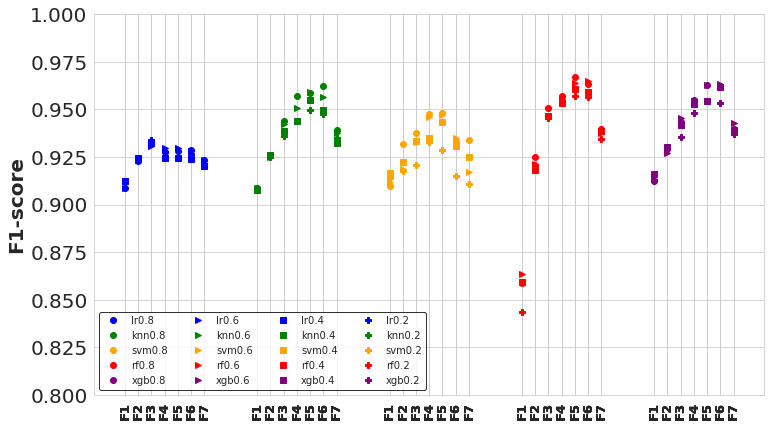

In [15]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5

space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(res, models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[2], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs=plt.errorbar( a, result[2], fmt=marker[i], label = model[1]+str(s[i]), color = color)
        axs=plt.ylabel("F1-score", fontweight = 'bold', fontsize =20)
        axs=plt.ylim(.80, 1)
        label = ''
        count += 1
    
    axs = plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 20)
    axs=plt.legend(loc = 'lower left', ncol = 4, edgecolor = 'k')# 'lower left')
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []
    
plt.savefig('plots/ml-results/test_comb.pdf')        
plt.show()

---

# BASELINE

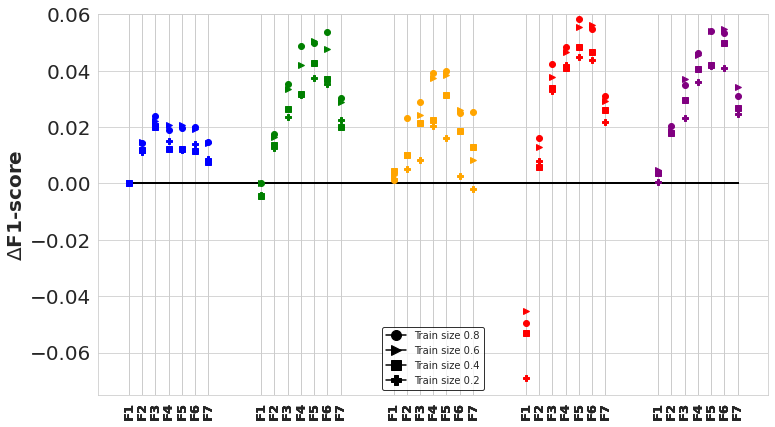

In [16]:
mfc_dot = ['k', 'g', 'b', 'r']
colors = ['blue', 'green', 'orange', 'red', 'purple']
marker = ['o', '>', 's', 'P']
fig, axs = plt.subplots( figsize=(12, 7))

count = 0
n = 5

space = []
tickFeat = []
i = 0
while i < 4:
    res = all_res[i]
    s = [0.8, 0.6, 0.4, 0.2]
    tick = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
    for result, model, color in zip(all_base[i], models, colors):
        a = np.linspace(n*count, n*(1+count)-2,len(features)) # to get index on the x-axis
        space.extend(a)
        
        tickFeat.extend(tick)
        # axs=plt.errorbar( a, result[1], fmt=marker[i], mfc =mfc_dot[i], label = model[1]+str(s[i]), color = color)
        axs=plt.errorbar( a, result[1], fmt=marker[i], label = model[1], color = color)
        axs=plt.ylabel("$\Delta$F1-score", fontweight = 'bold', fontsize =20)
        axs=plt.ylim(-0.075,0.06)
        label = ''
        count += 1
    # print(space)    
    axs = plt.plot(np.array(space), np.zeros(len(space)), color = 'Black')
    axs = plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =13, fontweight = 'bold')
    plt.yticks(fontsize = 20)
    
    # Manually creating legend for first 5 points
    handles = [plt.Line2D([0], [0], marker="s", color=colors[i], markerfacecolor=colors[i], markersize=10, label=modelname[i])
           for i in range(5)]
    handles1 = [plt.Line2D([0], [0], marker=marker[i], color='k', markerfacecolor='k', markersize=10, label="Train size " + str(s[i]))
           for i in range(4)]
    axs_legend=plt.legend(handles=handles, loc = 'lower left', edgecolor = 'k')
    # axs.add_artist(axs_legend)
    
    axs=plt.legend(handles=handles1, loc = 'lower center', edgecolor = 'k')
    i+= 1
    count = 0
    n = 5
    tickFeat_corr = []

plt.savefig('plots/ml-results/diff_comb.pdf')        
plt.show()